In [1]:
import pandas as pd
import numpy as np
import csv 
import twint
import tweepy

from tqdm.auto import tqdm
from glob import glob
import subprocess
import logging
from time import sleep

In [2]:
print(pd.read_csv('data/tweet_data.csv', usecols=['username']).nunique(),
pd.read_csv('data/accounts_v4.csv', usecols=['username']).nunique())

username    729
dtype: int64 username    961
dtype: int64


In [10]:
# usernames = pd.read_csv('data/all_groups_notna.csv', usecols=['username'])
usernames = pd.read_csv('data/accounts_v4.csv', usecols=['username'])
usernames_exist = [x.split('\\')[1][4:-11] for x in glob("tweets/*")]
usernames_not_exist = set(usernames.username) - set(usernames_exist)

print(set(usernames.username).__len__(), len(set(usernames_exist)), len(set(usernames_not_exist)))

962 1106 44


### Use Twint

In [4]:
# import datetime

# start_date = datetime.date(2016, 9, 25)
# end_date = datetime.date(2021, 9, 25)
# delta = datetime.timedelta(days=1)

{'tags': ['hide-input']}

In [ ]:
# logging.basicConfig(level=logging.INFO, filename='scrap_tweets.logs')

# for c, username in tqdm(enumerate(tqdm(usernames_not_exist))):
#     print(username)
#     start_date = datetime.date(2016, 9, 25)
#     end_date = datetime.date(2021, 9, 25)
#     delta = datetime.timedelta(days=1)
    
#     while start_date <= end_date:
        
#         prev_date = start_date
#         start_date += delta
#         next_date = start_date
        
#         try:
#             proc = subprocess.call('twint -u ' + username +
#                                    ' --since ' + str(prev_date) + ' --until ' + str(next_date) +
#                                    ' -o tweets_unauth/' + username + str(prev_date) + '_' + str(next_date) +'.json --json' ,
#                                    shell=True)
#         except:
#             logging.info(username)
            
# df = pd.read_csv('tweets_.csv', nrows=0, index_col=0)

# for c, username in tqdm(enumerate(usernames['username'][:175])):
#     try:
#         df_part = pd.io.json.read_json( 'tweets/' + username + '.json', lines=True)
#         df = df.append(df_part)
#     except:
#         pass
    
# bir kişi için yaklaşık 5 yıllık tweetleri toplaması 1.5 sa sürüyor
# bir kişi için 1 yıllık tweetler 18 dk diyebiliriz
# sleep olmalı ard arda gönderince almayabiliyor
# ard arda günleri alabiliyoruz şu ana kadar olan kısım için sıkıntı gözükmüyor

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

jale_balci


### Use Tweepy

In [4]:
CONSUMER_KEY = "HV3NOqxeREj1Cs766k5q69DhY"
CONSUMER_SECRET = "FU5ueTZ6SHXTGJxLDBVSg33ZWayUIBA7kPILQzGxcPA6jZcV23"
ACCESS_TOKEN = "784850369008529409-eqP4dFbxyrvhSAAjzIxDfIiQIzsycHy"
ACCESS_TOKEN_SECRET = "GkEkRL2BI80oPo6KXTjzRAx4sHYwwoYY81OMkvquWLJJv"

# Authenticate to Twitter
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create API object
api = tweepy.API(auth)

In [6]:
def get_all_tweets(screen_name):
    
    # Authenticate to Twitter
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

    # Create API object
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        #print(f"getting tweets before {oldest}")
        
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        #print(f"...{len(alltweets)} tweets downloaded so far")
        print("{:.2f}".format(len(alltweets)/3220), end="\r")
              
    
#     df = _
    
#     with tqdm(total=len(alltweets)) as pbar:
#         for c, tweet in enumerate(alltweets):
#             if not c:
#                 df = pd.json_normalize(tweet._json)
#             else:
#                 df = df.append(pd.json_normalize(tweet._json))
            
#             pbar.update(1)
            
#     df.to_csv(f'new_{screen_name}_tweets.csv', index=False)
            
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.entities, tweet.retweeted] for tweet in alltweets]
    
    pd.DataFrame(data=outtweets).to_csv('tweets/new_' + screen_name + '_tweets.csv', index=False)
    
#     #write the csv  
#     with open(f'new_{screen_name}_tweets.csv', 'w') as f:
#         writer = csv.writer(f)
#         writer.writerow(["id","created_at","text"])
#         writer.writerows(outtweets)
    
#     pass

In [9]:
for userID in tqdm(usernames_not_exist):
    try:
        get_all_tweets(userID)
        sleep(5)
    except:
        pass

  0%|          | 0/44 [00:00<?, ?it/s]

  2%|▏         | 1/44 [00:15<10:58, 15.31s/it]

 16%|█▌        | 7/44 [00:36<01:15,  2.03s/it]

 25%|██▌       | 11/44 [00:56<01:27,  2.67s/it]

 36%|███▋      | 16/44 [01:17<00:59,  2.14s/it]

 57%|█████▋    | 25/44 [01:40<00:15,  1.19it/s]

 64%|██████▎   | 28/44 [01:49<00:27,  1.73s/it]

 86%|████████▋ | 38/44 [02:04<00:03,  1.71it/s]

 91%|█████████ | 40/44 [02:20<00:15,  3.83s/it]

 98%|█████████▊| 43/44 [02:40<00:04,  4.23s/it]

100%|██████████| 44/44 [02:48<00:00,  3.83s/it]


### Statistics

- kullanıcı başına (hist)
    - toplam kaç tweet
- yıl başına (hist)
    - toplam kaç tweet
- kalanlar neden inmemiş
- temel modeller (n-gram, bert, -parametrik girdi-, fasstext)
- yaş dağılımı dengeli olmalı 

In [11]:
import pandas as pd
df = pd.read_csv('tweet_data.csv')

#### Number of tweets throughout months

In [8]:
df['date_month'] = df.created_at.apply(lambda x: x[:7])

<AxesSubplot:xlabel='date_month'>

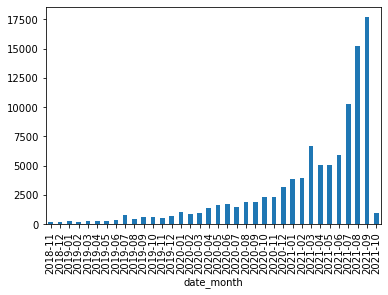

In [11]:
df_part = df[df.meslek=='ogr']
tw_counts_by_year = pd.Series(df_part.groupby('date_month')['id_str'].count()).sort_index()
tw_counts_by_year[-36:].plot.bar()

It seem that students are dominant in the total number of tweets expecially in recent months.

<AxesSubplot:xlabel='date_month'>

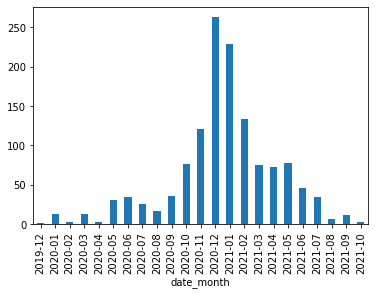

In [90]:
# A sample ogr user tweets' distribution over months
df[df.username=='mr_aytas'].groupby('date_month')['id_str'].count().sort_index().plot.bar()